## Importing the dataset 

In [1]:
#changing columns names to similar ones as the dataset!
import numpy as np
import pandas as pd

d=pd.read_csv("data_capec_multilabel.csv")

d=d.rename(index=str, columns={'000 - Normal': 'normal'})
d=d.rename(index=str, columns={'272 - Protocol Manipulation': 'protocol manipulation'})
d=d.rename(index=str, columns={'242 - Code Injection': 'code injection'})
d=d.rename(index=str, columns={'88 - OS Command Injection': 'os command injection'})
d=d.rename(index=str, columns={'126 - Path Traversal': 'path traversal'})
d=d.rename(index=str, columns={'66 - SQL Injection': 'sql injection'})
d=d.rename(index=str, columns={'16 - Dictionary-based Password Attack': 'dictionary based password attack'})
d=d.rename(index=str, columns={'310 - Scanning for Vulnerable Software': 'scanning for vulnerable software'})
d=d.rename(index=str, columns={'153 - Input Data Manipulation': 'input data manipulation'})
d=d.rename(index=str, columns={'248 - Command Injection': 'command injection'})
d=d.rename(index=str, columns={'274 - HTTP Verb Tampering': 'http verb tampering'})
d=d.rename(index=str, columns={'194 - Fake the Source of Data': 'fake the source of data'})
d=d.rename(index=str, columns={'34 - HTTP Response Splitting': 'http response splitting'})
d=d.rename(index=str, columns={'33 - HTTP Request Smuggling': 'http request smuggling'})
d['request_referer'].value_counts().head()



C:\Users\PRITPAL SINGH\AppData\Local\Temp\ipykernel_25400\874374581.py:5: DtypeWarning: Columns (9,11,12,13,14,15,16,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  d=pd.read_csv("data_capec_multilabel.csv")


,timestamp,src_ip,src_port,dst_ip,dst_port,request_http_method,request_http_request,request_http_protocol,request_user_agent,request_referer,...,os command injection,path traversal,sql injection,dictionary based password attack,scanning for vulnerable software,input data manipulation,http verb tampering,fake the source of data,http response splitting,http request smuggling
0,17/Jul/2020:12:23:34 +0100,172.26.0.1,55894.0,172.26.0.4,80.0,GET,/,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3...,NaN,...,0,0,0,0,0,0,0,0,0,0
1,17/Jul/2020:12:23:41 +0100,172.26.0.1,55897.0,172.26.0.4,80.0,GET,/blog/index.php/2020/04/04/voluptatum-reprehen...,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,17/Jul/2020:12:23:51 +0100,172.26.0.1,55901.0,172.26.0.4,80.0,GET,/blog/xmlrpc.php?rsd,HTTP/1.1,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,17/Jul/2020:12:23:51 +0100,172.26.0.1,55902.0,172.26.0.4,80.0,GET,/,HTTP/1.1,Mozilla/5.0 (Linux; Android 4.2.2; SM-T110 Bui...,NaN,...,0,0,0,0,0,0,0,0,0,0
4,17/Jul/2020:12:23:58 +0100,172.26.0.1,55903.0,172.26.0.4,80.0,GET,/blog/index.php/2020/04/04/nihil-tenetur-et-ad...,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,NaN,...,0,0,0,0,0,0,0,0,0,0


## EDA

In [2]:
print(d.shape)
print(d.info())

(907815, 37)
<class 'pandas.core.frame.DataFrame'>
Index: 907815 entries, 0 to 907814
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   timestamp                         907813 non-null  object 
 1   src_ip                            907813 non-null  object 
 2   src_port                          907813 non-null  float64
 3   dst_ip                            907813 non-null  object 
 4   dst_port                          907813 non-null  float64
 5   request_http_method               907813 non-null  object 
 6   request_http_request              907813 non-null  object 
 7   request_http_protocol             907813 non-null  object 
 8   request_user_agent                903981 non-null  object 
 9   request_referer                   291394 non-null  object 
 10  request_host                      907781 non-null  object 
 11  request_origin                    1609 non-n

In [4]:
d=d[['timestamp','src_port','request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message','response_content_length','normal','protocol manipulation','code injection','os command injection','path traversal','sql injection','dictionary based password attack','scanning for vulnerable software','input data manipulation','http verb tampering','fake the source of data','http response splitting','http request smuggling']]
d

,timestamp,src_port,request_http_method,request_http_request,request_referer,request_user_agent,request_cookie,request_accept,request_body,response_http_status_message,...,os command injection,path traversal,sql injection,dictionary based password attack,scanning for vulnerable software,input data manipulation,http verb tampering,fake the source of data,http response splitting,http request smuggling
0,17/Jul/2020:12:23:34 +0100,55894.0,GET,/,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3...,NaN,*/*,NaN,OK,...,0,0,0,0,0,0,0,0,0,0
1,17/Jul/2020:12:23:41 +0100,55897.0,GET,/blog/index.php/2020/04/04/voluptatum-reprehen...,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,NaN,*/*,NaN,OK,...,0,0,0,0,0,0,0,0,0,0
2,17/Jul/2020:12:23:51 +0100,55901.0,GET,/blog/xmlrpc.php?rsd,NaN,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,NaN,*/*,NaN,OK,...,0,0,0,0,0,0,0,0,0,0
3,17/Jul/2020:12:23:51 +0100,55902.0,GET,/,NaN,Mozilla/5.0 (Linux; Android 4.2.2; SM-T110 Bui...,NaN,*/*,NaN,OK,...,0,0,0,0,0,0,0,0,0,0
4,17/Jul/2020:12:23:58 +0100,55903.0,GET,/blog/index.php/2020/04/04/nihil-tenetur-et-ad...,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,NaN,*/*,NaN,OK,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907810,29/Jul/2020:22:26:31 +0100,53171.0,GET,/,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,NaN,*/*,NaN,OK,...,0,0,0,0,0,0,0,0,0,0
907811,29/Jul/2020:22:27:26 +0100,53179.0,GET,/,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5)...,NaN,*/*,NaN,OK,...,0,0,0,0,0,0,0,0,0,0
907812,29/Jul/2020:22:27:49 +0100,53185.0,GET,/,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...,NaN,*/*,NaN,OK,...,0,0,0,0,0,0,0,0,0,0
907813,29/Jul/2020:22:28:28 +0100,53192.0,GET,/,NaN,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,*/*,NaN,OK,...,0,0,0,0,0,0,0,0,0,0


In [5]:
d.head(907814)
d1='updated.csv'
d.to_csv(d1,index=False)

In [6]:
d.isnull().sum()
#d['request_http_method'].value_counts()

#removing rows that are null 
d=d.dropna(subset=['timestamp'])
d.isnull().sum()

#making response content length =0 for those rows which have null value
d['response_content_length'].fillna(0,inplace=True)
d['response_content_length']=d['response_content_length'].astype(int)
d.isnull().sum()
#d['request_http_method'].value_counts()

#d.to_csv(d2,index=False)
d2=d[['timestamp','src_port','request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message','response_content_length','normal','protocol manipulation','code injection','os command injection','path traversal','sql injection','dictionary based password attack','scanning for vulnerable software','input data manipulation','http verb tampering','fake the source of data','http response splitting','http request smuggling']]
d2.to_csv('new.csv',index=False)
d.isnull().sum()
#d2.describe()

C:\Users\PRITPAL SINGH\AppData\Local\Temp\ipykernel_25400\4259645886.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['response_content_length'].fillna(0,inplace=True)
C:\Users\PRITPAL SINGH\AppData\Local\Temp\ipykernel_25400\4259645886.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['response_content_length']=d['response_content_length'].astype(int)


timestamp                                0
src_port                                 0
request_http_method                      0
request_http_request                     0
request_referer                     616419
request_user_agent                    3832
request_cookie                      462551
request_accept                      526030
request_body                        881070
response_http_status_message             0
response_content_length                  0
normal                                   0
protocol manipulation                    0
code injection                           0
os command injection                     0
path traversal                           0
sql injection                            0
dictionary based password attack         0
scanning for vulnerable software         0
input data manipulation                  0
http verb tampering                      0
fake the source of data                  0
http response splitting                  0
http reques

In [8]:
#Removing the duplicate rows
d2.duplicated(subset=None).sum()
exact_duplicates = d2[d2.duplicated(subset=None, keep=False)].head(5)
print(exact_duplicates)
#d2.isnull().sum()

                        timestamp  src_port request_http_method  \
13025  17/Jul/2020:21:39:19 +0200   64679.0                 GET   
13030  17/Jul/2020:21:39:19 +0200   64679.0                 GET   
13628  17/Jul/2020:21:40:12 +0200   64685.0                 GET   
13629  17/Jul/2020:21:40:12 +0200   64686.0                 GET   
13631  17/Jul/2020:21:40:12 +0200   64685.0                 GET   

                                    request_http_request request_referer  \
13025  /blog/index.php/2020/04/04/labore-pariatur-ame...             NaN   
13030  /blog/index.php/2020/04/04/labore-pariatur-ame...             NaN   
13628  /blog/index.php/2020/04/04/nihil-tenetur-et-ad...             NaN   
13629  /blog/index.php/2020/04/04/nihil-tenetur-et-ad...             NaN   
13631  /blog/index.php/2020/04/04/nihil-tenetur-et-ad...             NaN   

                                      request_user_agent  \
13025  Mozilla/5.0 (X11; Linux x86_64; rv:70.0) Gecko...   
13030  Mozilla/5.0 (

## Plotting to gain inferences

### Request_content_length

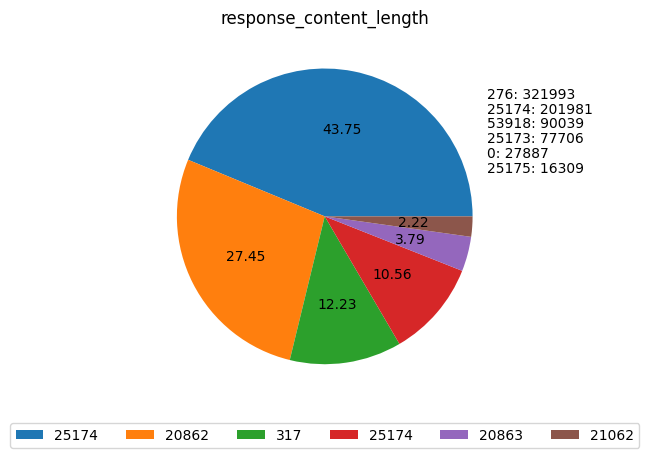

38.89842952237961
40.60285543388341
52.17407109173365
85.55407336092345
85.78517822503092
98.85538100908448


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


#sns.countplot(d2['response_content_length'])
#print(d2['response_content_length'].value_counts().sort_index())


# Assuming d2 is your DataFrame
top_colors = d2['response_content_length'].value_counts().nlargest(6)

# Plot the pie chart
plt.pie(top_colors, autopct='%.2f', labels=None)

# Create a separate text representation for the top 6 colors
for i, (label, count) in enumerate(zip(top_colors.index, top_colors)):
    plt.text(1.1, 0.8 - i * 0.1, f"{label}: {count}", fontsize=10, color='black', ha='left')

plt.legend(labels=d2['response_content_length'], loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=16)

plt.title("response_content_length")

plt.show()
#d2['response_content_length'].value_counts().plot(kind='bar',autopct='%.2f')
#plt.hist(d2['response_content_length'])
print((d2['response_content_length']<277).mean()*100)
print((d2['response_content_length']<400).mean()*100)
print((d2['response_content_length']<25000).mean()*100)
print((d2['response_content_length']<26000).mean()*100)
print((d2['response_content_length']<50000).mean()*100)
print((d2['response_content_length']<60000).mean()*100)

#jiski content length 277 se kam h uska percentage dikha rha h


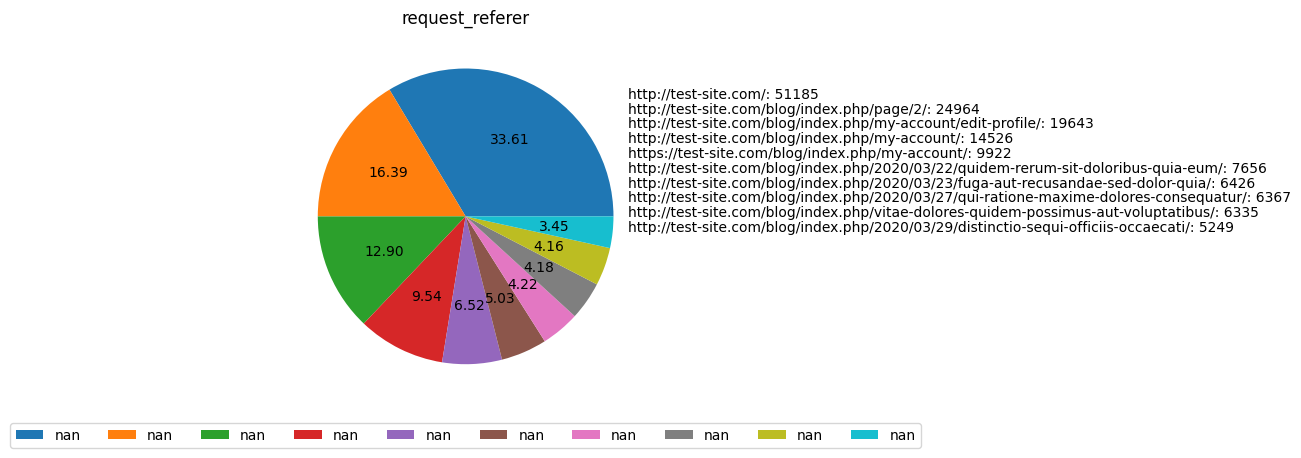

In [12]:
top_colors = d2['request_referer'].value_counts().nlargest(10)

# Plot the pie chart
plt.pie(top_colors, autopct='%.2f', labels=None)

# Create a separate text representation for the top 6 colors
for i, (label, count) in enumerate(zip(top_colors.index, top_colors)):
    plt.text(1.1, 0.8 - i * 0.1, f"{label}: {count}", fontsize=10, color='black', ha='left')

plt.legend(labels=d2['request_referer'], loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=16)


plt.title("request_referer")
plt.show()
#d2['response_content_length'].value_counts().plot(kind='bar',autopct='%.2f')
# #plt.hist(d2['response_content_length'])

# print((d2['response_content_length']<277).mean()*100)
# print((d2['response_content_length']<400).mean()*100)
# print((d2['response_content_length']<25000).mean()*100)
# print((d2['response_content_length']<26000).mean()*100)
# print((d2['response_content_length']<50000).mean()*100)
# print((d2['response_content_length']<60000).mean()*100)

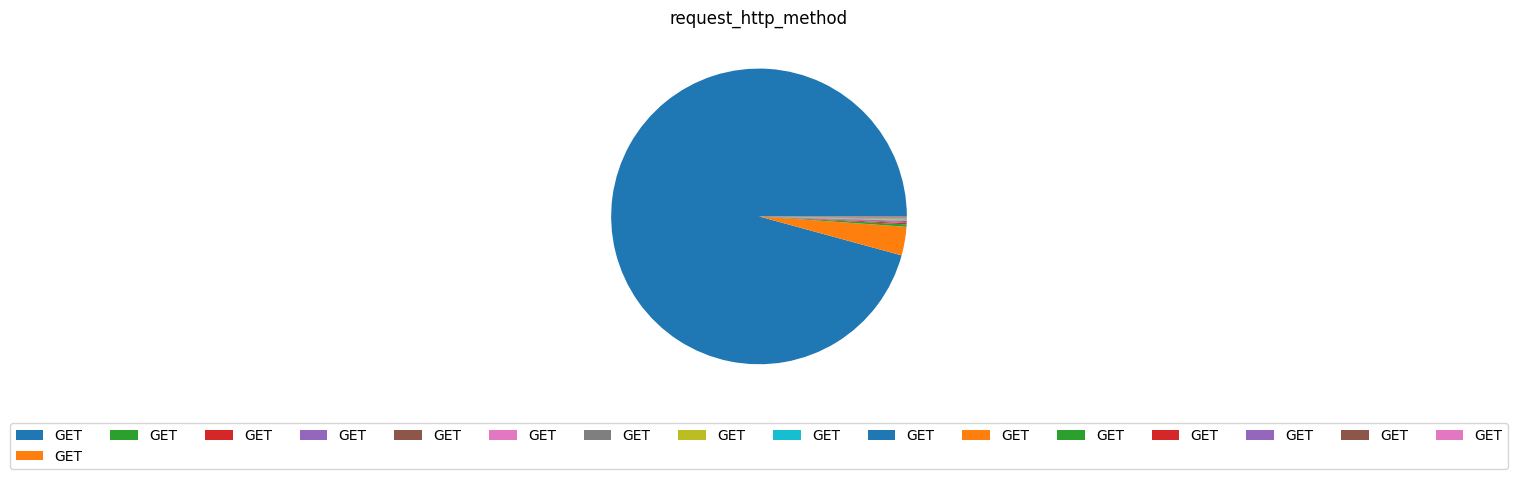

In [18]:
#top_colors = d2['request_http_method'].value_counts().nlargest(10)

# Plot the pie chart
plt.title("request_http_method")
plt.pie(d2['request_http_method'].value_counts())
plt.legend(labels=d2['request_http_method'], loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=16)


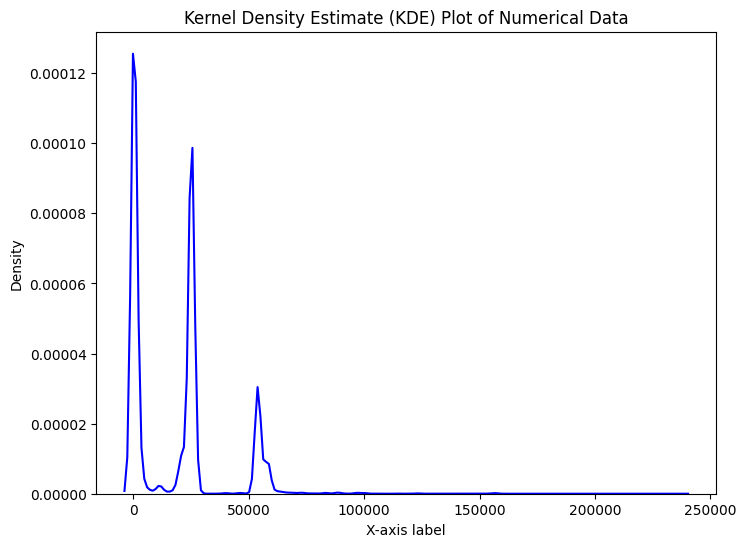

In [20]:
#KDE plot for reponse_content_length
plt.figure(figsize=(8, 6))
sns.kdeplot(d2['response_content_length'], color='blue')
plt.xlabel('X-axis label')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot of Numerical Data')
plt.show()

(array([4.72414e+05, 3.06355e+05, 1.22993e+05, 3.09800e+03, 1.51400e+03,
        3.79000e+02, 7.27000e+02, 2.20000e+02, 5.50000e+01, 5.80000e+01]),
 array([     0.,  23644.,  47288.,  70932.,  94576., 118220., 141864.,
        165508., 189152., 212796., 236440.]),
 <BarContainer object of 10 artists>)

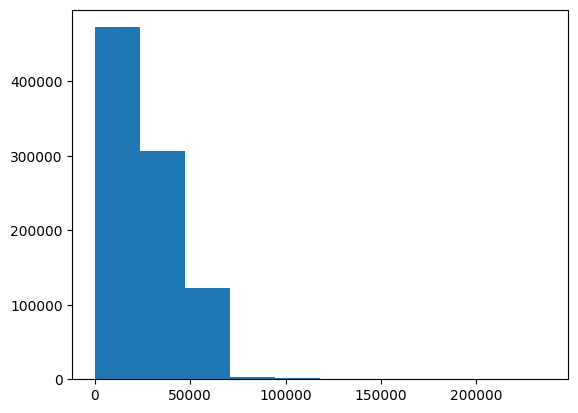

In [21]:
#hist
plt.hist(d2['response_content_length'])

## PreProcessing

In [22]:
d2.columns

Index(['timestamp', 'src_port', 'request_http_method', 'request_http_request',
       'request_referer', 'request_user_agent', 'request_cookie',
       'request_accept', 'request_body', 'response_http_status_message',
       'response_content_length', 'normal', 'protocol manipulation',
       'code injection', 'os command injection', 'path traversal',
       'sql injection', 'dictionary based password attack',
       'scanning for vulnerable software', 'input data manipulation',
       'http verb tampering', 'fake the source of data',
       'http response splitting', 'http request smuggling'],
      dtype='object')

In [36]:
d2['request_http_method'].value_counts()


request_http_method
GET          869268
POST          28381
TRACE          2340
OPTIONS        1284
HEAD           1103
TRACK           906
LOCK            453
PROPPATCH       453
PROPFIND        453
MOVE            453
MKCOL           453
PATCH           453
COPY            453
PUT             453
CONNECT         453
UNLOCK          453
THBQ              1
Name: count, dtype: int64

In [37]:
d2['request_http_request'].value_counts().head(10)


request_http_request
/                                                                                     299009
/blog/index.php/comments/feed/                                                         14271
/blog/index.php/my-account/                                                             4440
/blog/index.php/2020/04/04/ipsa-ea-porro-distinctio/                                    4389
/blog/index.php/2020/04/04/hic-porro-nihil-non-rerum/                                   4265
/blog/index.php/feed/                                                                   4156
/blog/wp-login.php                                                                      3710
/blog/index.php/registration/                                                           3460
/blog/wp-login.php?action=register                                                      3355
/blog/index.php/2020/04/04/explicabo-qui-fuga-distinctio-dolores-voluptatibus-sit/      3271
Name: count, dtype: int64

In [38]:
d2['request_user_agent'].value_counts()

request_user_agent
Mozilla/5.0 (X11; Linux x86_64; rv:70.0) Gecko/20100101 Firefox/70.0               506816
Mozilla/5.0 (X11; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0                15483
Mozilla/5.0 (compatible; Nmap Scripting Engine; https://nmap.org/book/nse.html)      2734
Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)              579
Jakarta Commons-HttpClient/3.1                                                        453
                                                                                    ...  
HTTP://www.google.com/search?q=OWASP%20passion                                          1
HTTP://www.google.com:80/search?q=OWASP%20information                                   1
https://www.google.com/search?q=OWASP%20delivery                                        1
https://www.google.com:80/search?q=OWASP%20science                                      1
\underscore.min.js                                                               

In [39]:
#what are the non_null values in the 'request_accept'
non_null_rows = d[d['request_accept'].notna()]#displaying all non null values
d['request_accept']
#count_encoding=d['request_http_method'].value_counts().to_dict()#doing frequency/count encoding
#d['request_http_method']=d['request_http_method'].map(count_encoding)
d['request_body'].value_counts()
d.isnull().sum()

filtered_d = d[(d['request_cookie'].isna()) & (d['normal'] == 1)]
print(filtered_d['request_accept'])
print(filtered_d.shape[0])

0         */*
1         */*
2         */*
3         */*
4         */*
         ... 
907810    */*
907811    */*
907812    */*
907813    */*
907814    */*
Name: request_accept, Length: 389012, dtype: object
389012


In [41]:
non_null_rows = d[d['request_cookie'].notna()]#displaying all non null values
d['request_cookie']
#count_encoding=d['request_http_method'].value_counts().to_dict()#doing frequency/count encoding
#d['request_http_method']=d['request_http_method'].map(count_encoding)
d['request_body'].value_counts()
d.isnull().sum()

filtered_d = d[(d['request_cookie'].isna()) & (d['normal'] == 1)]
print(filtered_d['request_cookie'])
print(filtered_d.shape[0])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
907810    NaN
907811    NaN
907812    NaN
907813    NaN
907814    NaN
Name: request_cookie, Length: 389012, dtype: object
389012


In [42]:
print(d2.shape[0]-d2['request_referer'].isnull().sum())

291394


In [43]:
d2.isnull().sum()

timestamp                                0
src_port                                 0
request_http_method                      0
request_http_request                     0
request_referer                     616419
request_user_agent                    3832
request_cookie                      462551
request_accept                      526030
request_body                        881070
response_http_status_message             0
response_content_length                  0
normal                                   0
protocol manipulation                    0
code injection                           0
os command injection                     0
path traversal                           0
sql injection                            0
dictionary based password attack         0
scanning for vulnerable software         0
input data manipulation                  0
http verb tampering                      0
fake the source of data                  0
http response splitting                  0
http reques

In [45]:
#dropping non null values
df_no_nulls = d2.dropna(subset=['request_referer'])

# Calculate value counts for the specific column
value_counts = df_no_nulls['request_referer'].value_counts()

# Define the prefix you want to filter by
prefix = 'http'

# Filter rows that start with the specified prefix
filtered_rows = df_no_nulls[df_no_nulls['request_referer'].str.startswith(prefix)]
print(len(filtered_rows))


289406


## Encoding

In [46]:
#!pip install category_encoders
import category_encoders as ce
d3=d2[['request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message','response_content_length','normal','protocol manipulation','code injection','os command injection','path traversal','sql injection','dictionary based password attack','scanning for vulnerable software','input data manipulation','http verb tampering','fake the source of data','http response splitting','http request smuggling']]
d3.to_csv('before_encoding.csv',index=False)

columns_to_encode = ['request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message']
encoder = ce.CountEncoder(cols=columns_to_encode)
encoded_df = encoder.fit_transform(d3[columns_to_encode])
d3[columns_to_encode]=encoded_df
d3.to_csv('encoded_file.csv',index=False)
d4=pd.read_csv('encoded_file.csv')
d4.columns

C:\Users\PRITPAL SINGH\AppData\Local\Temp\ipykernel_25400\2298281467.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3[columns_to_encode]=encoded_df


Index(['request_http_method', 'request_http_request', 'request_referer',
       'request_user_agent', 'request_cookie', 'request_accept',
       'request_body', 'response_http_status_message',
       'response_content_length', 'normal', 'protocol manipulation',
       'code injection', 'os command injection', 'path traversal',
       'sql injection', 'dictionary based password attack',
       'scanning for vulnerable software', 'input data manipulation',
       'http verb tampering', 'fake the source of data',
       'http response splitting', 'http request smuggling'],
      dtype='object')

In [48]:
d4.isnull().sum()

request_http_method                 0
request_http_request                0
request_referer                     0
request_user_agent                  0
request_cookie                      0
request_accept                      0
request_body                        0
response_http_status_message        0
response_content_length             0
normal                              0
protocol manipulation               0
code injection                      0
os command injection                0
path traversal                      0
sql injection                       0
dictionary based password attack    0
scanning for vulnerable software    0
input data manipulation             0
http verb tampering                 0
fake the source of data             0
http response splitting             0
http request smuggling              0
dtype: int64

In [51]:
d4.head(200)

,request_http_method,request_http_request,request_referer,request_user_agent,request_cookie,request_accept,request_body,response_http_status_message,response_content_length,normal,...,os command injection,path traversal,sql injection,dictionary based password attack,scanning for vulnerable software,input data manipulation,http verb tampering,fake the source of data,http response splitting,http request smuggling
0,869268,299009,616419,360,462551,365990,881070,436532,25174,1,...,0,0,0,0,0,0,0,0,0,0
1,869268,3095,616419,385,462551,365990,881070,436532,20862,1,...,0,0,0,0,0,0,0,0,0,0
2,869268,173,616419,376,462551,365990,881070,436532,317,1,...,0,0,0,0,0,0,0,0,0,0
3,869268,299009,616419,342,462551,365990,881070,436532,25174,1,...,0,0,0,0,0,0,0,0,0,0
4,869268,3095,616419,367,462551,365990,881070,436532,20863,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,869268,1806,616419,344,462551,365990,881070,436532,21905,1,...,0,0,0,0,0,0,0,0,0,0
196,869268,4389,616419,407,462551,365990,881070,436532,21080,1,...,0,0,0,0,0,0,0,0,0,0
197,869268,4156,616419,362,462551,365990,881070,436532,11420,1,...,0,0,0,0,0,0,0,0,0,0
198,869268,4156,616419,330,462551,365990,881070,436532,11420,1,...,0,0,0,0,0,0,0,0,0,0


## MODEL TRAINING

### BinaryRelevance classifier with Random Forest 

In [52]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

X = d4[['request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message','response_content_length']]

# Targets (y)
y = d4[['normal','protocol manipulation','code injection','os command injection','path traversal','sql injection','dictionary based password attack','scanning for vulnerable software','input data manipulation','http verb tampering','fake the source of data','http response splitting','http request smuggling']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a BinaryRelevance classifier with Random Forest as the base classifier
classifier = BinaryRelevance(classifier=RandomForestClassifier(n_estimators=100, random_state=42), require_dense=[True, True])

# Train the BinaryRelevance classifier
classifier.fit(X_train, y_train)

# Make predictions using the trained BinaryRelevance classifier
y_pred = classifier.predict(X_test)

c:\Users\PRITPAL SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRITPAL SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRITPAL SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRITPAL SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRITPAL SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomFo

In [67]:
#performance metrics for br_rf using pkl 
import joblib
joblib.dump(classifier,'br_rf.pkl')

import joblib as jl
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

loaded_c=jl.load('br_rf.pkl')
d4=pd.read_csv('encoded_file.csv')
X = d4[['request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message','response_content_length']]

# # Targets (y)
y = d4[['normal','protocol manipulation','code injection','os command injection','path traversal','sql injection','dictionary based password attack','scanning for vulnerable software','input data manipulation','http verb tampering','fake the source of data','http response splitting','http request smuggling']]

# # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred1=loaded_c.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1, average='micro')
hamming_loss_value = hamming_loss(y_test, y_pred1)

print(f"Accuracy: {accuracy}")
print(f"F1-score (micro): {f1}")
print(f"Hamming Loss: {hamming_loss_value}")

c:\Users\PRITPAL SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRITPAL SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRITPAL SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRITPAL SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRITPAL SINGH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomFo

Accuracy: 0.8124617901224368
F1-score (micro): 0.8555356231982073
Hamming Loss: 0.021358129981583


In [72]:
f1_macro = f1_score(y_test, y_pred1, average='macro')
print('f1(macro) ',f1_macro)

from sklearn.metrics import precision_score
precision_micro = precision_score(y_test, y_pred1, average='micro')
print('precision micro ',precision_micro)

precision_macro = precision_score(y_test, y_pred1, average='macro')
print('precision macro ',precision_macro)

from sklearn.metrics import recall_score
recall_micro = recall_score(y_test, y_pred1, average='micro')
recall_macro = recall_score(y_test, y_pred1, average='macro')
print('recall micro ',recall_micro)
print('recall_macro ',recall_macro)

from sklearn.metrics import roc_auc_score

# Convert sparse predictions to dense numpy arrays 
y_pred1_dense = y_pred1.toarray()

# Calculate micro-average ROC AUC
micro_roc_auc = roc_auc_score(y_test, y_pred1_dense, average='micro')

print("Micro-Averaged ROC AUC:", micro_roc_auc)

from sklearn.metrics import jaccard_score

# Calculate micro-average Jaccard similarity
micro_jaccard = jaccard_score(y_test, y_pred1_dense, average='micro')

print("Micro-Averaged Jaccard Similarity:", micro_jaccard)

f1(macro)  0.7163913101879349
precision micro  0.9028627073844907
precision macro  0.8208491572088796
recall micro  0.812923076923077
recall_macro  0.6616777379144788
Micro-Averaged ROC AUC: 0.9027724576812358
Micro-Averaged Jaccard Similarity: 0.7475423792473145


### Classifier Chain + Random Forest

In [55]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import hamming_loss

X = d4[['request_http_method','request_http_request','request_referer','request_user_agent','request_cookie','request_accept','request_body','response_http_status_message','response_content_length']]

# Targets (y)
y = d4[['normal','protocol manipulation','code injection','os command injection','path traversal','sql injection','dictionary based password attack','scanning for vulnerable software','input data manipulation','http verb tampering','fake the source of data','http response splitting','http request smuggling']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_classifier = RandomForestClassifier()
classifier_chain = ClassifierChain(base_classifier, order='random')

classifier_chain.fit(X_train, y_train)

y_pred1 = classifier_chain.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1, average='micro')
hamming_loss_value = hamming_loss(y_test, y_pred1)
print(f"Accuracy: {accuracy}")
print(f"F1-score (micro): {f1}")
print(f"Hamming Loss: {hamming_loss_value}")
#done here

Accuracy: 0.8541718301636346
F1-score (micro): 0.8554474453510189
Hamming Loss: 0.022457981315237473


In [53]:
import joblib as jl

In [58]:
#running the cc_rf through pickle file

jl.dump(classifier_chain,'clas_chain_rf.pkl')

#import pandas as pd

#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

loaded_c=jl.load('clas_chain_rf.pkl')
#d4=pd.read_csv('encoded_file.csv')
y_pred = loaded_c.predict(X_test)


Accuracy: 0.8541718301636346
F1-score (micro): 0.8554474453510189
Hamming Loss: 0.022457981315237473


In [64]:
#performance metrics for classifier_chain + random forest
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming_loss_value = hamming_loss(y_test, y_pred)
print('br+rf')
print(f"Accuracy: {accuracy}")
print(f"F1-score (micro): {f1}")
print(f"Hamming Loss: {hamming_loss_value}")

f1_macro = f1_score(y_test, y_pred, average='macro')
#print('f1(macro) ',f1_macro)

from sklearn.metrics import precision_score
precision_micro = precision_score(y_test, y_pred, average='micro')
print('precision micro ',precision_micro)

precision_macro = precision_score(y_test, y_pred, average='macro')
#print('precision macro ',precision_macro)

from sklearn.metrics import recall_score
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
print('recall micro ',recall_micro)
#print('recall_macro ',recall_macro)

from sklearn.metrics import roc_auc_score

# # Convert sparse predictions to dense numpy arrays 
# y_pred1_dense = y_pred.toarray()

# Calculate micro-average ROC AUC
micro_roc_auc = roc_auc_score(y_test, y_pred, average='micro')

print("Micro-Averaged ROC AUC:", micro_roc_auc)

from sklearn.metrics import jaccard_score

# Calculate micro-average Jaccard similarity
micro_jaccard = jaccard_score(y_test, y_pred, average='micro')

print("Micro-Averaged Jaccard Similarity:", micro_jaccard)

# Find the index corresponding to the 'normal' label
label='sql injection'
label_index = list(y_test.columns).index(label)

# Calculate TP, TN, FP, FN for the 'normal' label
TP = sum((y_test.iloc[:, label_index] == 1) & (y_pred[:, label_index] == 1))
FN = sum((y_test.iloc[:, label_index] == 1) & (y_pred[:, label_index] == 0))
TN = sum((y_test.iloc[:, label_index] == 0) & (y_pred[:, label_index] == 0))
FP = sum((y_test.iloc[:, label_index] == 0) & (y_pred[:, label_index] == 1))

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate Markedness
informedness = sensitivity + specificity - 1

# print("Sensitivity:", sensitivity)
# print("Specificity:", specificity)
print("Informedness:", informedness)

precision = TP / (TP + FP)
negative_predictive_value = TN / (TN + FN)

# Calculate Markedness
markedness = precision + negative_predictive_value - 1

#print("Precision:", precision)
#print("Negative Predictive Value:", negative_predictive_value)
print("Markedness:", markedness)

br+rf
Accuracy: 0.8541718301636346
F1-score (micro): 0.8554474453510189
Hamming Loss: 0.022457981315237473
precision micro  0.8567230539821608
recall micro  0.8541756296800544
Micro-Averaged ROC AUC: 0.9210623928009166
Micro-Averaged Jaccard Similarity: 0.7474077462641049
Informedness: 0.8115455377096235
Markedness: 0.7285882065372817


## Performance Analysis 

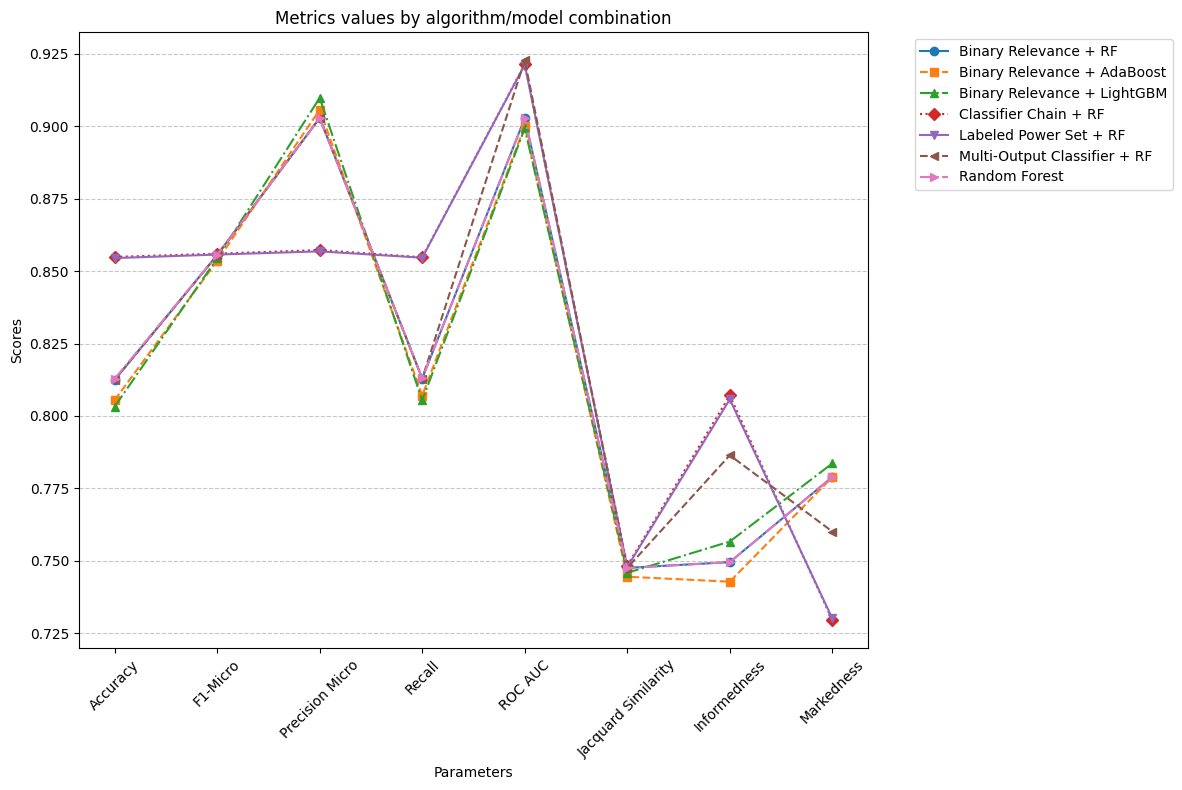

In [75]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = [
    "Binary Relevance + RF",
    "Binary Relevance + AdaBoost",
    "Binary Relevance + LightGBM",
    "Classifier Chain + RF",
    "Labeled Power Set + RF",
    "Multi-Output Classifier + RF",
    "Random Forest"
]

# Parameters
parameters = [
    "Accuracy",
    "F1-Micro",
    "Precision Micro",
    "Recall",
    "ROC AUC",
    "Jacquard Similarity",
    "Informedness",
    "Markedness"
]

# Scores
scores = [
    [0.81246, 0.85553, 0.90286, 0.81292, 0.90277, 0.74754, 0.74953, 0.77892],
    [0.80549, 0.85353,  0.90572, 0.80703, 0.89997, 0.74449, 0.74277, 0.77886],
    [0.80321, 0.85442, 0.90981, 0.80539, 0.89932, 0.74584, 0.75663, 0.78360],
    [0.85490, 0.85603,  0.85728, 0.85479, 0.92139, 0.74830, 0.80709, 0.72951],
    [0.85450, 0.85571,  0.85681, 0.85462, 0.92128, 0.74781, 0.80572, 0.73010],
    [0.81246    ,0.85553          ,0.90286   ,0.81292  ,0.92277   ,0.74754   ,0.78643  ,0.76010],
    [0.81285    ,0.85552          ,0.90279   ,0.81295  ,0.90278   ,0.74751   ,0.74953  ,0.77892]
]

# Plotting
plt.figure(figsize=(12, 8))

line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
markers = ['o', 's', '^', 'D', 'v', '<', '>']

for i in range(len(algorithms)):
    plt.plot(parameters, scores[i], label=algorithms[i], linestyle=line_styles[i], marker=markers[i])

plt.title('Metrics values by algorithm/model combination')
plt.xlabel('Parameters')
plt.ylabel('Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

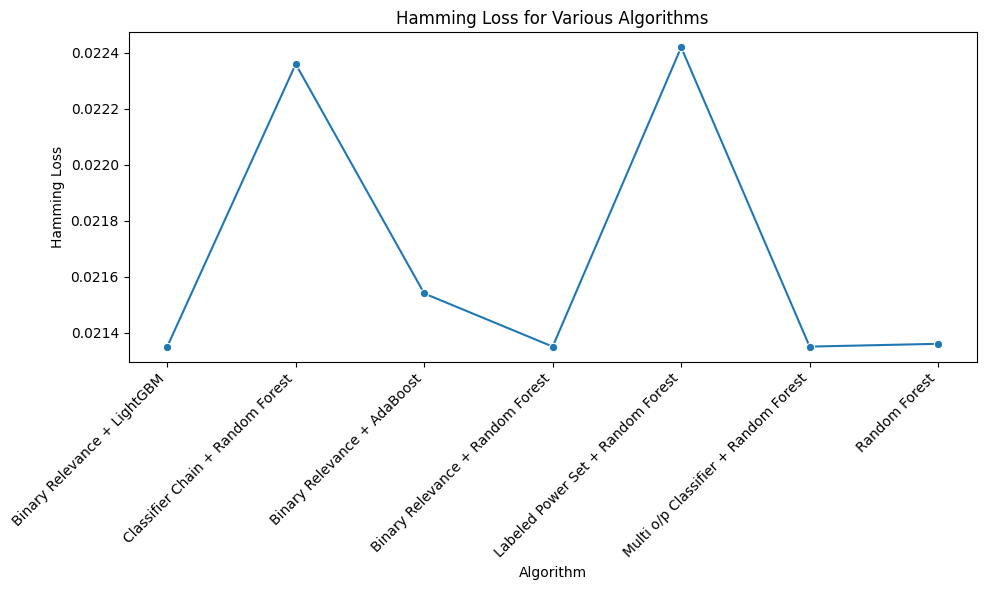

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
algorithms = [
    "Binary Relevance + LightGBM",
    "Classifier Chain + Random Forest",
    "Binary Relevance + AdaBoost",
    "Binary Relevance + Random Forest",
    "Labeled Power Set + Random Forest",
    "Multi o/p Classifier + Random Forest",
    "Random Forest"
]

hamming_loss_values = [0.02135, 0.02236, 0.02154, 0.02135, 0.02242, 0.02135,0.02136]

# Create a DataFrame
data = {"Algorithm": algorithms, "Hamming Loss": hamming_loss_values}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x="Algorithm", y="Hamming Loss", marker="o", data=df)
plt.title("Hamming Loss for Various Algorithms")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [77]:
#thank you

## Pipelining

In [1]:
from sklearn.compose import ColumnTransformer
from category_encoders import CountEncoder
from sklearn.preprocessing import OneHotEncoder

# Assuming trf is your transformer
trf = ColumnTransformer([
    ('trf', CountEncoder(), ['request_http_method','request_http_request','request_referer','request_user_agent',
                             'request_cookie','request_accept','request_body','response_http_status_message',
                             'response_content_length'])
])

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline



# Create a two-step pipeline with Binary Relevance
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', BinaryRelevance(classifier=RandomForestClassifier(n_estimators=100, random_state=42)))
])


In [2]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('trf',
                                                  CountEncoder(combine_min_nan_groups=True),
                                                  ['request_http_method',
                                                   'request_http_request',
                                                   'request_referer',
                                                   'request_user_agent',
                                                   'request_cookie',
                                                   'request_accept',
                                                   'request_body',
                                                   'response_http_status_message',
                                                   'response_content_length'])])),
                ('step2',
                 BinaryRelevance(classifier=RandomForestClassifier(random_state=42),
                                 require_dense=[True, True]))])